## IMPORTING PACKAGES

In [7]:
import numpy as np
import pandas as pd
import os 
import preprocessingV1
import matplotlib.pyplot as plt
from copy import deepcopy as dc

path = os.getcwd()

# READING DATA

In [8]:
import random
from random import sample
# ========================================================================
signal_16zt = preprocessingV1.get_filename('16zt')
signal_8zt = preprocessingV1.get_filename('8zt')
signal_0zt = preprocessingV1.get_filename('0zt')

random.seed(10)

# 16zt =====================================================================
test_idx_16zt = sample(range(1,len(signal_16zt)),3)
train_idx_16zt = sample(range(1,len(signal_16zt)),7)
train_idx_16zt = [0]
test_idx_16zt = [1]
# 8zt =====================================================================
test_idx_8zt = sample(range(1,len(signal_16zt)),3)
train_idx_8zt = sample(range(1,len(signal_8zt)),7)

# 0zt =====================================================================
test_idx_0zt = sample(range(1,len(signal_16zt)),3)
train_idx_0zt = sample(range(1,len(signal_0zt)),7)

name_dict = {'16zt': (signal_16zt[train_idx_16zt], signal_16zt[test_idx_16zt]),
             '8zt': (signal_8zt[train_idx_8zt], signal_8zt[test_idx_8zt]),
             '0zt': (signal_0zt[train_idx_0zt], signal_0zt[test_idx_0zt])}

In [9]:
from utils import generate_signal_dictionary
data = {}; data_test = {}
name = ['0zt','8zt','16zt']
name = ['16zt']
for n in name:
    data, data_test = generate_signal_dictionary(data, data_test,outlier_filter=True, name_dict = name_dict, name=n)

In [10]:
print('Train set =============================')
df, lab = preprocessingV1.generate_model_data(data_dictionary=data,mode = 'cnn1d',scale = None,verbose=True,hop_length=1024)
print('Test set =============================')
df_test, lab_test = preprocessingV1.generate_model_data(data_dictionary=data_test,mode = 'cnn1d',scale = None,verbose=True,hop_length=1024)

Train set =============================
Mode: cnn1d
Scale option: None
Model data shape: (3510, 1024), label shape: (3510,)
Class distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([ 150,  524,   62, 1522,  559,  693], dtype=int64))
Class encoding:  {'np': 0, 'c': 1, 'e1': 2, 'e2': 3, 'f': 4, 'pd': 5, 'g': 6}
Test set =============================
Mode: cnn1d
Scale option: None
Model data shape: (3037, 1024), label shape: (3037,)
Class distribution:  (array([0, 1, 2, 3, 4, 5], dtype=int64), array([  43,  337,  227, 2108,   24,  298], dtype=int64))
Class encoding:  {'np': 0, 'c': 1, 'e1': 2, 'e2': 3, 'f': 4, 'pd': 5, 'g': 6}


In [11]:
wave_array, ana = data['16zt_2022_10-10-ch1']

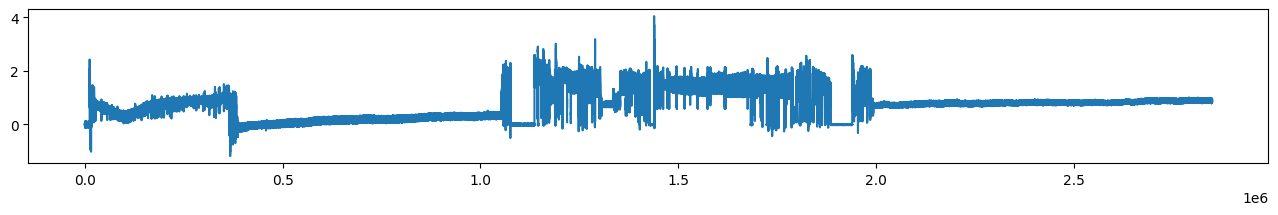

In [12]:
plt.figure(figsize=(16,2))
plt.plot(wave_array)

## TRADITIONAL MACHINE LEARNING

### FEATURE EXTRACTIONS

In [13]:
from MLDataGenerator import get_feature_matrix, preprocess

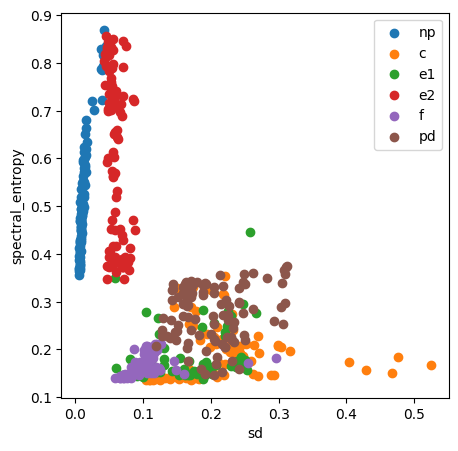

In [22]:
twovarplot(feature_matrix,label,1,8,100)

{'np': 0, 'c': 1, 'e1': 2, 'e2': 3, 'f': 4, 'pd': 5, 'g': 6}


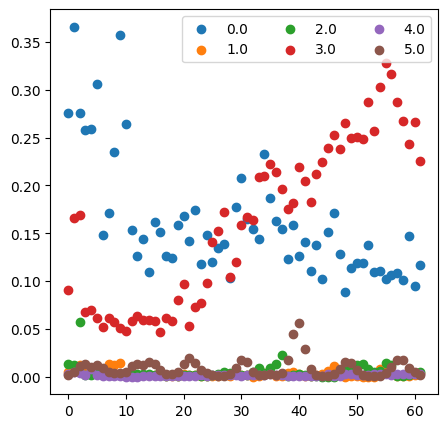

In [20]:
onevarplot(feature_matrix,label,10)

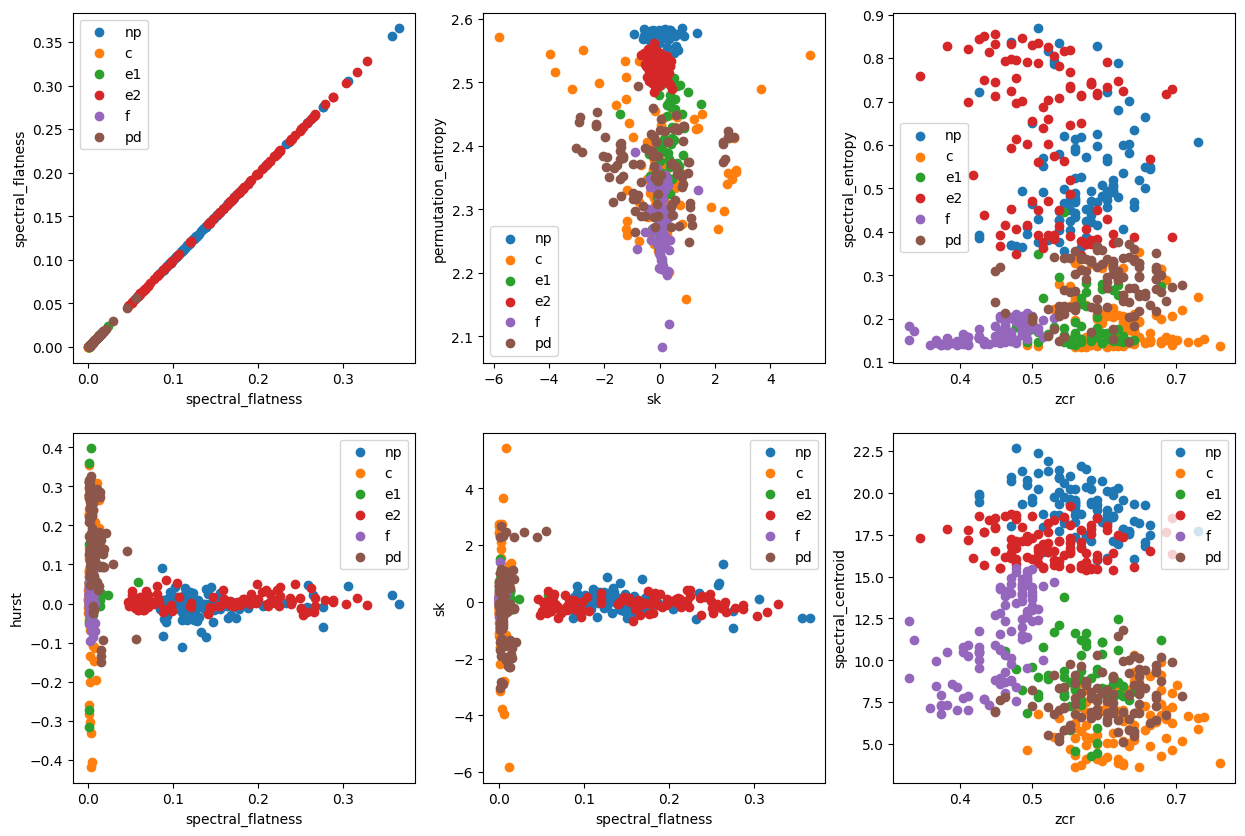

In [95]:
twovarplot_multiple(feature_matrix,label,n_obs = 100)

In [25]:
from sklearn.decomposition import PCA

In [80]:
n_components = 3
pca = PCA(n_components=n_components)
fm_pca = pca.fit_transform(feature_matrix,label)

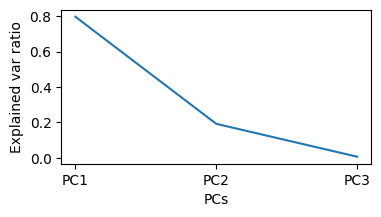

In [81]:
plt.figure(figsize=(4,2))
plt.plot(np.arange(n_components),pca.explained_variance_ratio_,)
plt.ylabel('Explained var ratio')
plt.xlabel('PCs')
plt.xticks(ticks = [n for n in range(n_components)],labels = [f'PC{n+1}'  for n in range(n_components)])
plt.show()

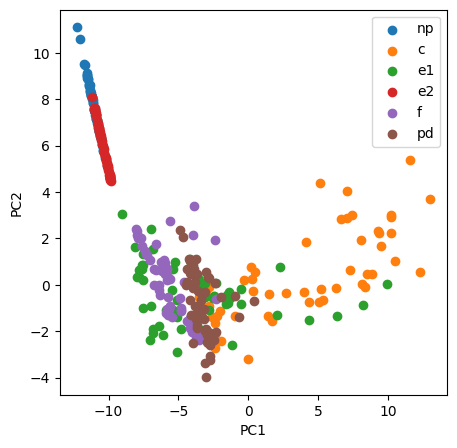

In [100]:
var1 = 0
var2 = 1
n_obs = 62
plt.figure(figsize=(5,5))
reverse_labels_dict = {0:'np',1:'c',2:'e1',3:'e2',4:'f',5:'pd',6:'g'}

classes = np.unique(label)

f1 = fm_pca[:,var1]; f2 = fm_pca[:,var2]
split1 = []; split2 = []

for i in range(len(classes)):
    split1.append(f1[label == classes[i]])
    split2.append(f2[label == classes[i]])

for i in range(len(classes)):
    plt.scatter(split1[i][0:n_obs],split2[i][0:n_obs],label = reverse_labels_dict[classes[i]])
plt.xlabel(f'PC{var1+1}')
plt.ylabel(f'PC{var2+1}')
plt.legend()


{'np': 0, 'c': 1, 'e1': 2, 'e2': 3, 'f': 4, 'pd': 5, 'g': 6}


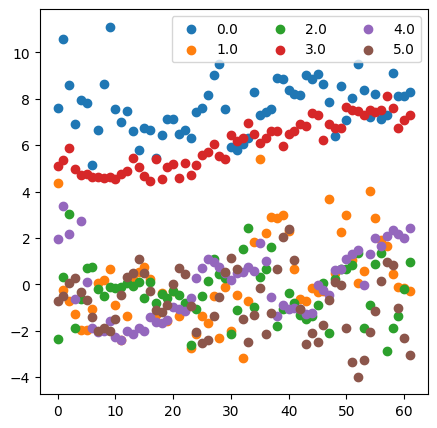

In [ ]:
onevarplot(fm_pca,label,1)

In [18]:
scale = [None]

fm_dictionary = {}
label_list = []
for s in scale:
    print('Getting feature matrices ...')
    feature_matrix = get_feature_matrix(df)
    feature_matrix_test = get_feature_matrix(df_test)
    print('Scaling feature matrices ...')
    fm,label = preprocess(feature_matrix,lab)
    fm_test,label_test = preprocess(feature_matrix_test,lab_test)

    fm_dictionary[s] = dict({'train':fm,'test':fm_test})
    label_list = dict({'train':label,'test':label_test})
    print('Done!!')

Getting feature matrices ...
Scaling feature matrices ...
Done!!


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, precision_score,recall_score, confusion_matrix,r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


In [23]:
model = {'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced'),
        'LogisticRegression':LogisticRegression(max_iter = 1000,n_jobs= -1),
        'SVC':SVC(kernel = 'linear',class_weight='balanced'),
        'RandomForestClassifier':RandomForestClassifier(class_weight='balanced',n_jobs=-1),
        'HistGradientBoostingClassifier':HistGradientBoostingClassifier(class_weight='balanced'),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'XGBClassifier':XGBClassifier()
}

In [24]:
# svc_gridsearch = GridSearchCV(SVC(),n_jobs = 1,param_grid={'C':[10**n for n in range(-6,3)],
#                                                'kernel':['linear','poly'],
#                                                'gamma':['scale','auto'],
#                                                'class_weight':['balanced']
#                                                 })

# dt_gridsearch = GridSearchCV(DecisionTreeClassifier(),n_jobs=-1,param_grid={'criterion':['gini','entropy','log_loss'],
#                                                                             'max_depth' : [3,4,5],
#                                                                             'splitter':['best','random'],
#                                                                             'class_weight':['balanced'],
#                                                                             'ccp_alpha':[10**n for n in range(-6,3)]
#                                                                             })

# rf_gridsearch = GridSearchCV(RandomForestClassifier(),n_jobs=-1,param_grid={'criterion':['gini','entropy','log_loss'],
#                                                                             'max_depth' : [3,4,5],
#                                                                             'splitter':['best','random'],
#                                                                             'class_weight':['balanced'],
#                                                                             'ccp_alpha':[10**n for n in range(-6,3)],
#                                                                             'n_estimators': [100,200,300],
#                                                                             'n_jobs' : [-1]
#                                                                             })

# hgb_gridsearch = GridSearchCV(HistGradientBoostingClassifier(),n_jobs=-1,
#                               param_grid={'loss':['log_loss','deviance','exponential'],
#                                            'learning_rate':[10**n for n in range(-5,0)],   
#                                             'n_estimators': [100,200,300],
#                                             'criterion':['friedman_mse','squared_error'],
#                                             'l2_regularization':[10**n for n in range(-5,0)],
#                                             'max_depth' : [3,4,5],
#                                             'class_weight':['balanced']
#                                                 })

# xgboost_gridsearch = GridSearchCV(XGBClassifier(),n_jobs=-1,
#                                   param_grid={'n_estimators':[50,100,200],
#                                                 'max_depth':[3,4,5],
#                                                 'booster':['gbtree','gblinear'],
#                                                 'learning_rate':[10**n for n in range(-5,0)],
#                                                 'n_jobs':[-1],
#                                                 'gamma':[10**n for n in range(-4,1)],
#                                                 'reg_lambda':[10**n for n in range(-4,1)],
#                                                 'device':['cuda']
#                                                 })

# models = [dc(svc_gridsearch),dc(dt_gridsearch),dc(rf_gridsearch),dc(hgb_gridsearch),dc(xgboost_gridsearch)]
# best_models_raw = []
# for m in models:
#     m.fit(df,lab)
#     best_models_raw.append(m.best_estimator_)

# models_PCA = [dc(svc_gridsearch),dc(dt_gridsearch),dc(rf_gridsearch),dc(hgb_gridsearch),dc(xgboost_gridsearch)]
# best_models_PCA = []
# for m in models_PCA:
#     m.fit(PC,lab)
#     best_models_PCA.append(m.best_estimator_)

In [25]:
def train_test_validation_split(X,y,train_size = 0.7,validation_size = 0.1,test_size = 0.2,shuffle = True):
    t = train_size + validation_size
    r = validation_size/t
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = test_size,stratify=y)
    x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = r,stratify=y_train)
    return x_train, x_val, x_test, y_train, y_val, y_test

def implement(model,x_train,x_test,y_train,y_test,result_list=[],cm_list = []):
        
        clf = model

        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        cf = confusion_matrix(y_pred,y_test)

        acc = round(accuracy_score(y_pred,y_test),3)
        balanced_acc = round(balanced_accuracy_score(y_pred,y_test),3)
        f1 = round(f1_score(y_pred,y_test,average='weighted',zero_division = 0),3)
        precision = round(precision_score(y_pred,y_test,average='weighted',zero_division = 0),3)
        recall = round(recall_score(y_pred,y_test,average='weighted',zero_division = 0),3)
        
        result_list.append([acc,balanced_acc,f1,precision,recall])
        cm_list.append(cf)


In [26]:
from MLutils import train, test, plot_result
import time 
train_result_of_different_scaling_option = {}
test_result_of_different_scaling_option = {}

scale = [None]
for s in scale:
    # Split ==============================
    x_train,x_val,y_train,y_val = train_test_split(fm,label,test_size = 0.2,stratify=label)

    # Training ==============================
    print('Training ...')
    fm = fm_dictionary[s]['train']
    label = label_list['train']
    
    results = []
    cms = []

    for model_name in model:
        
        start = time.perf_counter()
        clf = model[model_name]
        train(clf,x_train,x_val,y_train,y_val,results,cms)
        end = time.perf_counter()
        print(f'Model: {model_name} - Training time: {round(end-start,3)} s')
        print()

    results = pd.DataFrame(results)
    results.columns = ['Accuracy','Balanced Accuracy','f1','Precision','Recall']
    results.index = model.keys()

    # Testing ==============================
    print('Testing ...')
    x_test = fm_dictionary[s]['test']
    y_test = label_list['test']

    test_results = []
    test_cms = []

    for model_name in model:
        clf = model[model_name]
        test(clf,x_test,y_test,test_results,test_cms)

    test_results = pd.DataFrame(test_results)
    test_results.columns = ['Accuracy','Balanced Accuracy','f1','Precision','Recall']
    test_results.index = model.keys()

    # Saving results ==============================
    train_result_of_different_scaling_option[s] = results
    test_result_of_different_scaling_option[s] = test_results

Training ...

Call:  DecisionTreeClassifier(class_weight='balanced')
Training ...
Validating
Finished training
Model: DecisionTreeClassifier - Training time: 6.836 s

Call:  LogisticRegression(max_iter=1000)
Training ...
Validating
Finished training
Model: LogisticRegression - Training time: 5.003 s

Call:  SVC(class_weight='balanced', kernel='linear')
Training ...
Validating
Finished training
Model: SVC - Training time: 355.983 s

Call:  RandomForestClassifier(class_weight='balanced')
Training ...
Validating
Finished training
Model: RandomForestClassifier - Training time: 108.873 s

Call:  HistGradientBoostingClassifier(class_weight='balanced')
Training ...
Validating
Finished training
Model: HistGradientBoostingClassifier - Training time: 4.765 s

Call:  AdaBoostClassifier()
Training ...
Validating
Finished training
Model: AdaBoostClassifier - Training time: 21.646 s

Call:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_b

In [118]:
def plot_result(result_dict,scale = [None]):
    _,((ax1,ax2,ax3,ax4)) = plt.subplots(1,4,figsize = (16,3),sharex = True,sharey = True)

    model_name = ['DecTree','LR','SVC','RF','GB','Ada','XGB']
    n_model = len(model_name)

    xtick = np.arange(0,n_model)
    w = 0.1
    i=0

    for s in scale:
        r = result_dict[s] 
        ax1.bar(xtick+i*w*np.ones(n_model),r['Balanced Accuracy'],width = w, label = f'{s}')
        ax2.bar(xtick+i*w*np.ones(n_model),r['f1'],width = w, label = f'{s}')
        ax3.bar(xtick+i*w*np.ones(n_model),r['Precision'],width = w, label = f'{s}')
        ax4.bar(xtick+i*w*np.ones(n_model),r['Recall'],width = w, label = f'{s}')

        i+=1 

    ax1.set_title('Balanced Accuracy')
    ax2.set_title('f1')
    ax3.set_title('Precision')
    ax4.set_title('Recall')
    ax1.set_xticks(ticks = xtick,labels = model_name,rotation = 30)
    ax2.set_xticks(ticks = xtick,labels = model_name,rotation = 30)
    ax3.set_xticks(ticks = xtick,labels = model_name,rotation = 30)
    ax4.set_xticks(ticks = xtick,labels = model_name,rotation = 30)

    

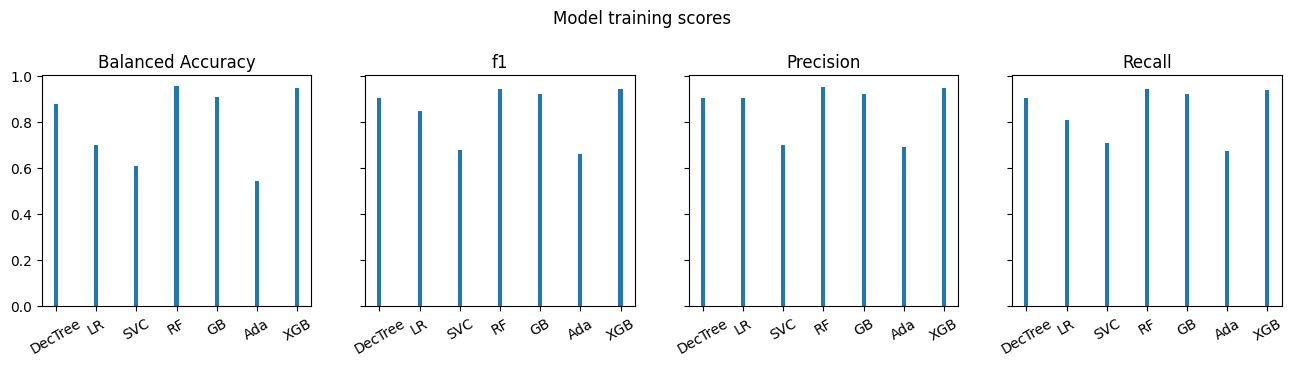

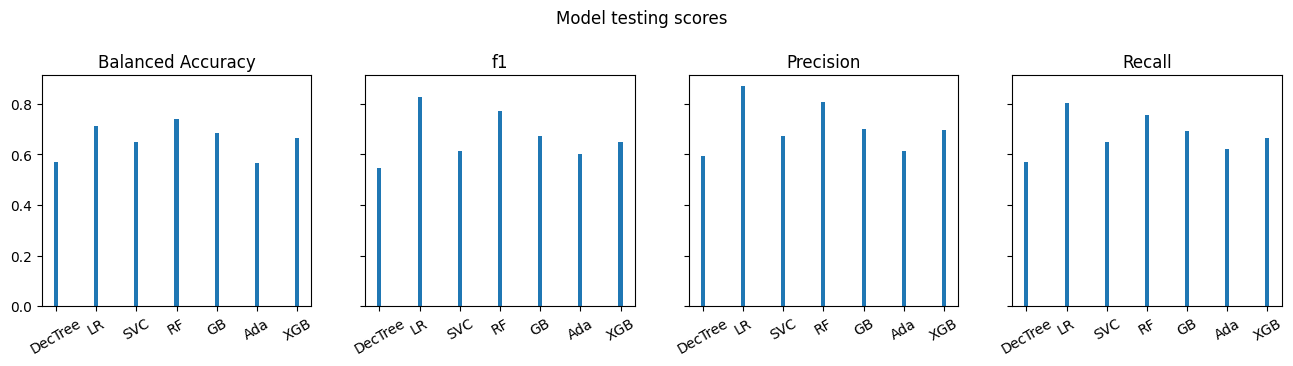

In [122]:
plot_result(train_result_of_different_scaling_option)
plt.suptitle('Model training scores',y=1.1)
plt.subplots_adjust(hspace = 0.4)
plot_result(test_result_of_different_scaling_option)
plt.suptitle('Model testing scores',y=1.1)
plt.subplots_adjust(hspace = 0.4)

In [107]:
import seaborn as sns
m_names = [*model.keys()]
enc = preprocessingV1.numeric_encoder()
targets_names = enc.labels_dict
def plot_confusion_matrix(cms,norm = False):
    fig, ax = plt.subplots(2,4,figsize=(16,6),sharex = True,sharey = True)

    for i in range(len(cms)):
        if norm == False:
            cm = cms[i]
            cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        elif norm == True:
            cm = cms[i]
        sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=targets_names, yticklabels=targets_names,cbar = False,ax = ax[i//4,i%4])
        ax[i//4,i%4].set_ylabel('Actual')
        ax[i//4,i%4].set_xlabel('Predicted')
        ax[i//4,i%4].set_title(m_names[i])
    plt.subplots_adjust(hspace=0.4)

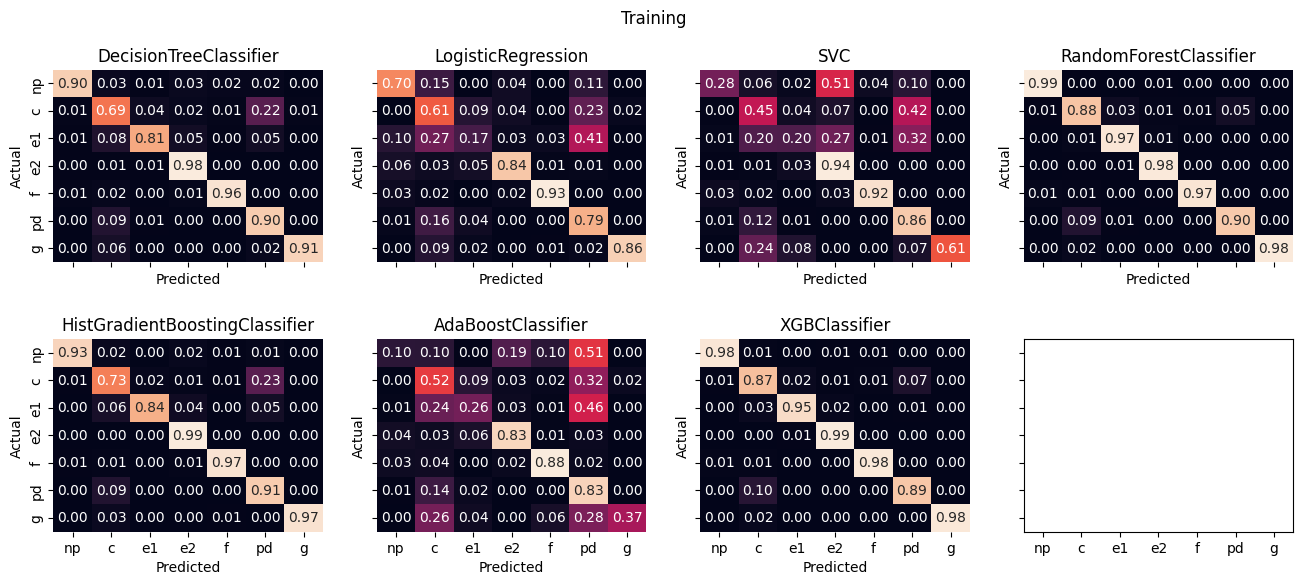

In [108]:
plot_confusion_matrix(cms)
plt.suptitle('Training')
plt.show()

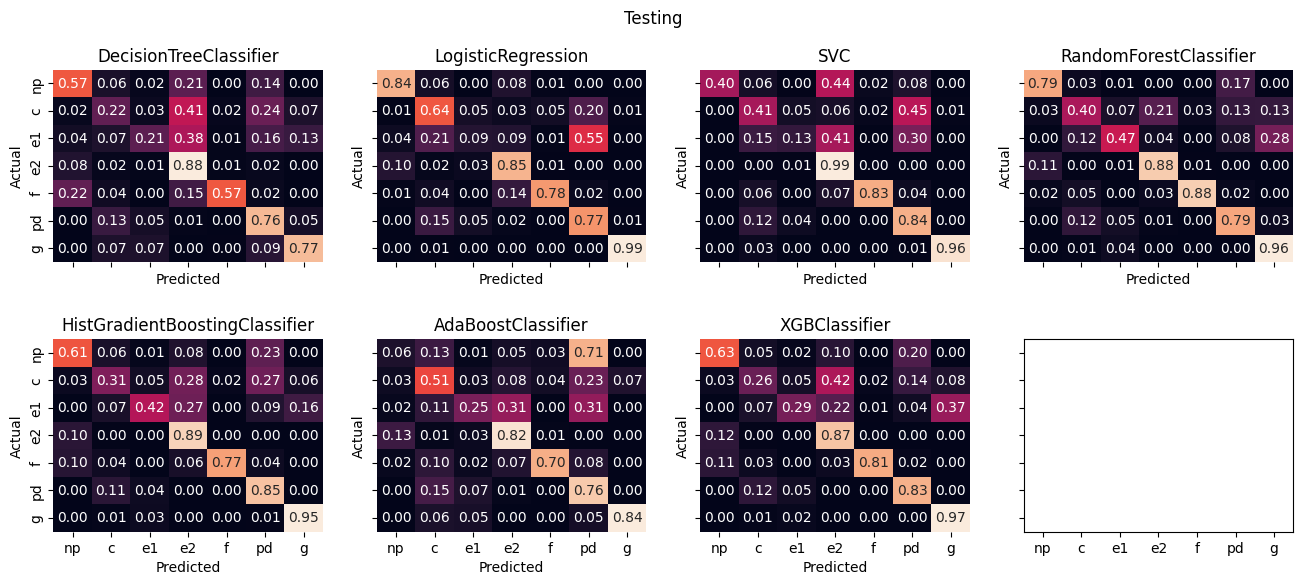

In [109]:
plot_confusion_matrix(test_cms)
plt.suptitle('Testing')
plt.show()

In [ ]:
acc = []
b_acc = []
n_estimators = [50,100,150,200,250,300,350,400,500]
for n in n_estimators:
    clf = dc(model['RandomForestClassifier'])
    clf.set_params(n_estimators = n,max_depth = 5)
    y_pred = clf.predict(fm_test)

    acc.append(accuracy_score(y_pred,lab_test))
    b_acc.append(balanced_accuracy_score(y_pred,lab_test))
# f1 = round(f1_score(y_pred,lab_test,average='weighted',zero_division = 0),3)
# precision = round(precision_score(y_pred,lab_test,average='weighted',zero_division = 0),3)
# recall = round(recall_score(y_pred,lab_test,average='weighted',zero_division = 0),3)

plt.plot(n_estimators,b_acc,label = 'balanced accuracy')

In [128]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [136]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(class_weight='balanced',n_jobs=-1),
                                min_features=1,max_features=11,scoring = 'accuracy',
                                cv = 5,n_jobs = -1
                                ).fit(fm,label)

: 